In [1]:
val path = java.nio.file.FileSystems.getDefault().getPath("/tmp/moonraker/coinbaseml/coinbaseml.jar")
interp.load.cp(ammonite.ops.Path(path))

path: java.nio.file.Path = /tmp/moonraker/coinbaseml/coinbaseml.jar

In [2]:
import $ivy.`org.plotly-scala::plotly-almond:0.8.0`

import $ivy.$                                      

In [3]:
import java.time.{Duration, Instant}

import co.firstorderlabs.coinbaseml.fakebase.{Constants, Exchange, MatchingEngine}
import co.firstorderlabs.common.protos.environment.ObservationRequest
import co.firstorderlabs.common.protos.events.OrderSide
import co.firstorderlabs.common.protos.fakebase.{SimulationStartRequest, SimulationType}
import co.firstorderlabs.common.currency.Configs.ProductPrice.{ProductVolume, QuoteVolume}
import co.firstorderlabs.common.currency.Configs.ProductPrice.ProductVolume
import co.firstorderlabs.common.currency.Configs.ProductPrice

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

import java.time.{Duration, Instant}


import co.firstorderlabs.coinbaseml.fakebase.{Constants, Exchange, MatchingEngine}

import co.firstorderlabs.common.protos.environment.ObservationRequest

import co.firstorderlabs.common.protos.events.OrderSide

import co.firstorderlabs.common.protos.fakebase.{SimulationStartRequest, SimulationType}

import co.firstorderlabs.common.currency.Configs.ProductPrice.{ProductVolume, QuoteVolume}

import co.firstorderlabs.common.currency.Configs.ProductPrice.ProductVolume

import co.firstorderlabs.common.currency.Configs.ProductPrice


import plotly._

import plotly.element._

import plotly.layout._

import plotly.Almond._

In [4]:
val simulationStartRequest = new SimulationStartRequest(
    startTime = Instant.parse("2020-11-19T00:00:00.00Z"),
    endTime = Instant.parse("2020-11-20T00:00:00.00Z"),
    timeDelta = Some(Duration.ofSeconds(30)),
    numWarmUpSteps = 100,
    initialProductFunds = new ProductVolume(Right("1.000000")),
    initialQuoteFunds = new QuoteVolume(Right("10000.00")),
    snapshotBufferSize = 100,
    observationRequest = Some(new ObservationRequest),
    enableProgressBar = false,
    simulationType = SimulationType.evaluation 
)

simulationStartRequest: SimulationStartRequest = SimulationStartRequest(
  2020-11-19T00:00:00Z,
  2020-11-20T00:00:00Z,
  Some(PT30S),
  100,
  <BtcVolume 1.00000000>,
  <UsdVolume 10000.00>,
  None,
  100,
  Some(ObservationRequest(0, false, None)),
  false,
  evaluation,
  BigQuery,
  false
)

In [5]:
Exchange.start(simulationStartRequest)

Dec 18, 2020 1:54:47 AM co.firstorderlabs.coinbaseml.fakebase.Exchange$ start
INFO: starting simulation 7ca0732f-6731-479a-ad2d-eb57fa41d417 for parameters SimulationMetadata(2020-11-19T00:00:00Z,2020-11-20T00:00:00Z,PT30S,100,<BtcVolume 1.00000000>,<UsdVolume 10000.00>,7ca0732f-6731-479a-ad2d-eb57fa41d417,ObservationRequest(0,false,None),false,evaluation,co.firstorderlabs.coinbaseml.fakebase.sql.BigQueryReader$@7712b117,100)
Dec 18, 2020 1:54:47 AM co.firstorderlabs.coinbaseml.fakebase.sql.DatabaseReader createSstFile
INFO: Data for BTC-USD-TimeInterval(2020-11-19T09:30:00Z,2020-11-19T10:00:00Z)-PT30S found locally. Skipping database query.
Dec 18, 2020 1:54:47 AM co.firstorderlabs.coinbaseml.fakebase.sql.DatabaseReader createSstFile
INFO: Data for BTC-USD-TimeInterval(2020-11-19T08:30:00Z,2020-11-19T09:00:00Z)-PT30S found locally. Skipping database query.
Dec 18, 2020 1:54:47 AM co.firstorderlabs.coinbaseml.fakebase.sql.DatabaseReader createSstFile
INFO: Data for BTC-USD-TimeInterval

res4: concurrent.Future[co.firstorderlabs.common.protos.fakebase.SimulationInfo] = Success(SimulationInfo(None, None))

In [17]:
val buyOrderBook = Exchange.getOrderBook(OrderSide.buy)
buyOrderBook.aggregateToMap(2000, true).toList.sortBy(i => i._1)

buyOrderBook: co.firstorderlabs.coinbaseml.fakebase.OrderBook = co.firstorderlabs.coinbaseml.fakebase.OrderBook@b6b3e2b
res16_1: List[(ProductPrice, ProductVolume)] = List(
  (<BtcUsdPrice 0.10>, <BtcVolume 10000.00000000>),
  (<BtcUsdPrice 0.15>, <BtcVolume 17000.00000000>),
  (<BtcUsdPrice 1.00>, <BtcVolume 6792.50339773>),
  (<BtcUsdPrice 1.77>, <BtcVolume 14.05402450>),
  (<BtcUsdPrice 3.00>, <BtcVolume 13500.00000000>),
  (<BtcUsdPrice 12.98>, <BtcVolume 2331.00000000>),
  (<BtcUsdPrice 17.65>, <BtcVolume 20.00000000>),
  (<BtcUsdPrice 18.50>, <BtcVolume 280.00000000>),
  (<BtcUsdPrice 173.00>, <BtcVolume 0.01018868>),
  (<BtcUsdPrice 305.00>, <BtcVolume 1.00000000>),
  (<BtcUsdPrice 1000.00>, <BtcVolume 37.25266165>),
  (<BtcUsdPrice 1500.00>, <BtcVolume 0.41530314>),
  (<BtcUsdPrice 1666.66>, <BtcVolume 0.11361834>),
  (<BtcUsdPrice 1815.00>, <BtcVolume 0.02000000>),
  (<BtcUsdPrice 2000.00>, <BtcVolume 0.70000000>),
  (<BtcUsdPrice 2650.00>, <BtcVolume 1.00000000>),
  (<BtcUsdP

In [18]:
{val midPrices = (1 to 2000).map{ _ =>
    Exchange.step(Constants.emptyStepRequest)
    MatchingEngine.calcMidPrice
}}

: 

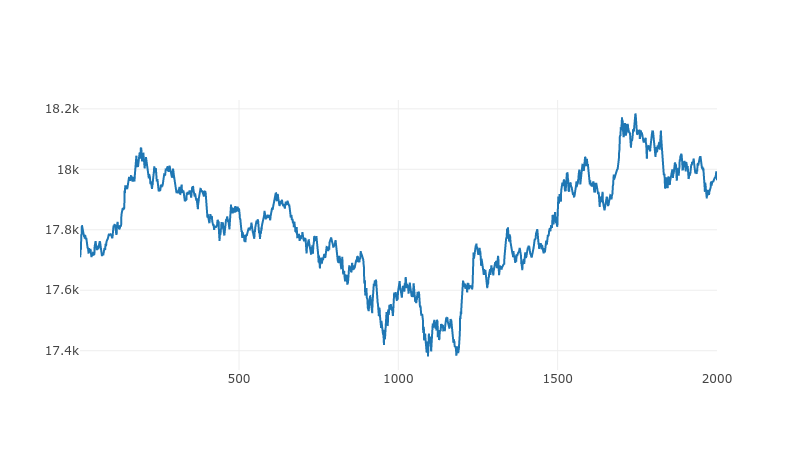

import plotly._


res6_1: String = "plot-98954876-8b7d-4eb9-9650-75276f177811"

In [7]:
import plotly._

Scatter((1 to midPrices.size), midPrices).plot()
// plot(Seq(s))

res23: Line.type = plotly.element.Line$@1b973cbc